<a href="https://colab.research.google.com/github/Veronicacosta-ui/-Bootcamp-Data-Analytics-WomakersCode/blob/main/desafio7_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Desafio 1: Titanic 🚢 - Bootcamp Data Analytics WomakersCode###

# 1.  Inserindo o arquivo contendo os dados provenientes na pasta WoMakersCode no google drive.

In [ ]:
import pandas as pd

file_id = "1ylUuhGk_qh_FivQ-pHI7KFY9-r1H7pH1"
url = f"https://drive.google.com/uc?id={file_id}"

df = pd.read_csv(url)
df.head(10)  # Exibe as primeiras linhas


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# 🔍 2. Exploração Inicial dos Dados

- Verificando  a estrutura do dataset:



In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Resumo estatístico das colunas numéricas

In [ ]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Verificando valores ausentes:

In [ ]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


 -  Corrigindo os Valores Ausentes

In [ ]:
# Preencher valores nulos da idade com a mediana (evita distorções)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Remover a coluna 'Cabin' (não é essencial e tem muitos nulos)
df.drop(columns=['Cabin'], inplace=True)

# Preencher valores nulos de 'Embarked' com a moda (valor mais frequente)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Verificar se os valores nulos foram corrigidos
print("\n✅ Após o tratamento, os valores nulos foram removidos:")
display(df.isnull().sum())



✅ Após o tratamento, os valores nulos foram removidos:


<ipython-input-36-e09b6ef6c07c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-36-e09b6ef6c07c>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# 3. Visualizando Outliers com Boxplots

- Podemos verificar possíveis outliers nas variáveis Age, Fare, SibSp e Parch.

<ipython-input-45-16b523f5ffdb>:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-45-16b523f5ffdb>:19: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-45-16b523f5ffdb>:19: UserWarning: Glyph 128104 (\N{MAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-45-16b523f5ffdb>:19: UserWarning: Glyph 128105 (\N{WOMAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-45-16b523f5ffdb>:19: UserWarning: Glyph 128103 (\N{GIRL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-45-16b523f5ffdb>:19: UserWarning: Glyph 128102 (\N{BOY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-45-16b523f5ffdb>:19: UserWarning: Glyph 128118 (\N{BABY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1282

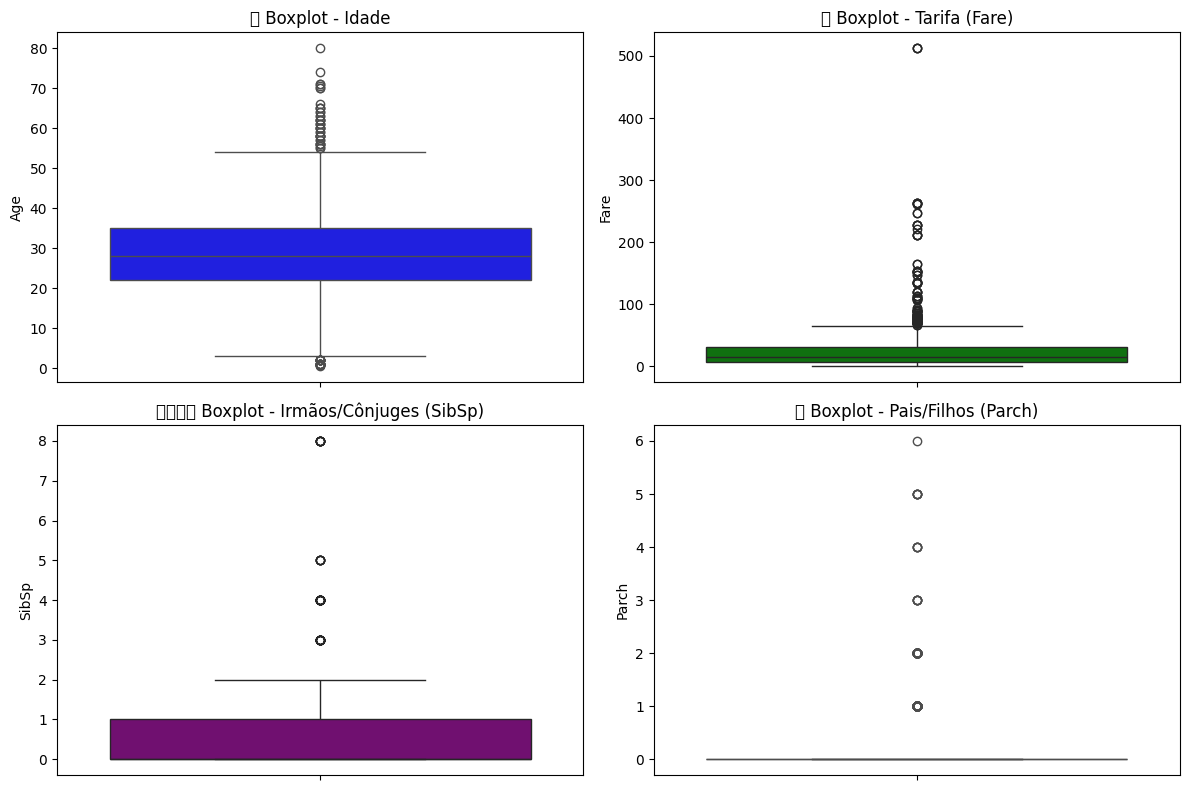

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando um grid de gráficos para visualizar outliers
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(y=df["Age"], ax=axes[0, 0], color="blue")
axes[0, 0].set_title("📊 Boxplot - Idade")

sns.boxplot(y=df["Fare"], ax=axes[0, 1], color="green")
axes[0, 1].set_title("💰 Boxplot - Tarifa (Fare)")

sns.boxplot(y=df["SibSp"], ax=axes[1, 0], color="purple")
axes[1, 0].set_title("👨‍👩‍👧‍👦 Boxplot - Irmãos/Cônjuges (SibSp)")

sns.boxplot(y=df["Parch"], ax=axes[1, 1], color="orange")
axes[1, 1].set_title("👶 Boxplot - Pais/Filhos (Parch)")

plt.tight_layout()
plt.show()


# 4. Identificando Outliers com IQR


O IQR (Intervalo Interquartil) define limites estatísticos para identificar outliers.

In [ ]:
# Função para detectar outliers usando IQR
def detectar_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers

# Aplicando a função nas colunas mais relevantes
outliers_age = detectar_outliers(df, "Age")
outliers_fare = detectar_outliers(df, "Fare")

# Exibir a quantidade de outliers detectados
print(f"📌 Outliers em Age: {outliers_age.shape[0]} encontrados")
print(f"📌 Outliers em Fare: {outliers_fare.shape[0]} encontrados")


📌 Outliers em Age: 66 encontrados
📌 Outliers em Fare: 116 encontrados


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados do Titanic
file_path = "/mnt/data/train.csv"
df = pd.read_csv(url)

# Função para detectar outliers usando IQR (Intervalo Interquartil)
def detectar_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers, limite_inferior, limite_superior

# Aplicando a função nas colunas mais relevantes
outliers_age, lim_inf_age, lim_sup_age = detectar_outliers(df, "Age")
outliers_fare, lim_inf_fare, lim_sup_fare = detectar_outliers(df, "Fare")

# Criando o dicionário com os resultados dos outliers
outliers_info = {
    "Variável": ["Age", "Fare"],
    "Outliers Detectados": [outliers_age.shape[0], outliers_fare.shape[0]],
    "Limite Inferior": [lim_inf_age, lim_inf_fare],
    "Limite Superior": [lim_sup_age, lim_sup_fare]
}

# Criando o DataFrame com os resultados
outliers_df = pd.DataFrame(outliers_info)

#from IPython.display import display

# Exibir os resultados no Jupyter Notebook
print("📊 Outliers Detectados:")
display(outliers_df)


📊 Outliers Detectados:


,Variável,Outliers Detectados,Limite Inferior,Limite Superior
0,Age,11,-6.6875,64.8125
1,Fare,116,-26.7240,65.6344


**análise dos outliers detectados:**

📊 Resultados

1️⃣ Age (Idade)

11 outliers encontrados (valores abaixo de -6.69 ou acima de 64.81 anos)
Como não existem idades negativas, os outliers provavelmente são passageiros muito idosos.

2️⃣ Fare (Tarifa do bilhete)

116 outliers encontrados (valores abaixo de -26.72 ou acima de 65.63)
Como tarifas negativas não fazem sentido, os outliers são tarifas extremamente altas.



# ✨ 5. Tratamento dos Outliers

Agora, podemos: ✔ Remover os outliers (para análises mais limpas)
✔ Ajustar os valores extremos (substituir por limites estatísticos)

<ipython-input-63-f2c217b1dd85>:45: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-63-f2c217b1dd85>:45: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


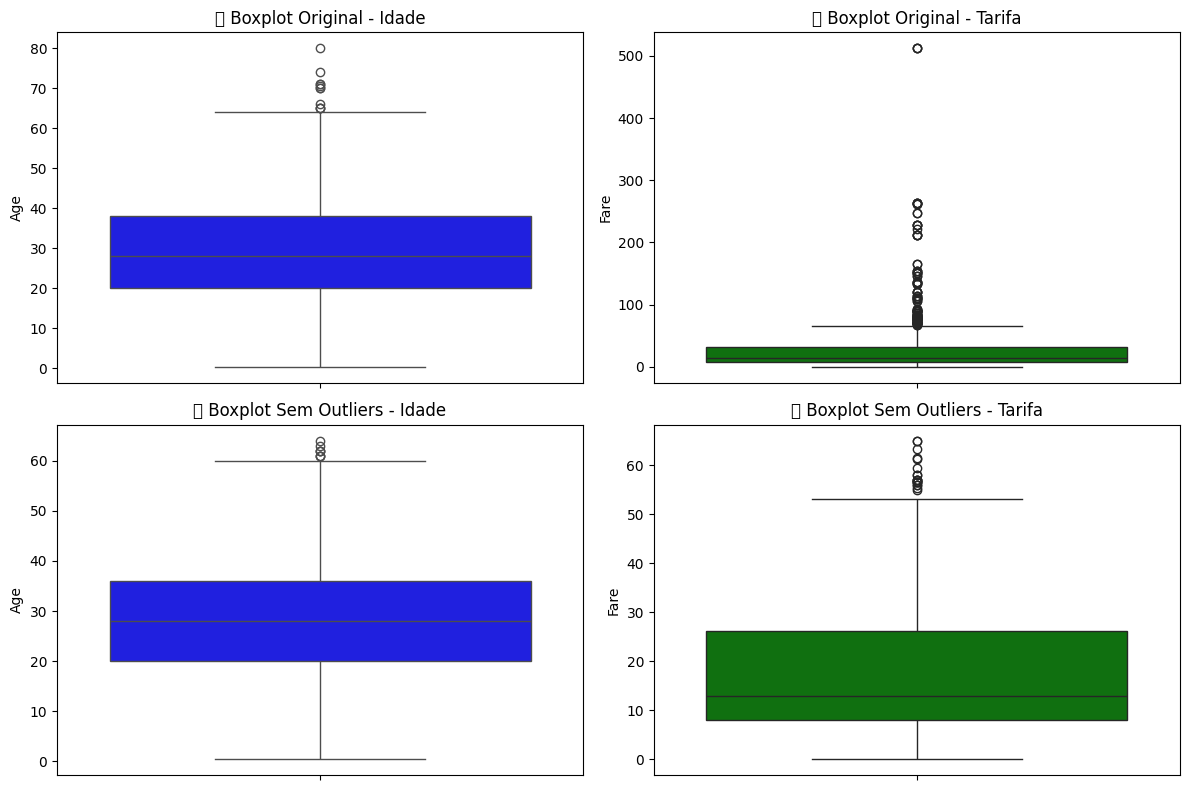

📊 Impacto da Remoção dos Outliers:


,Métrica,Age,Fare
0,Quantidade de Registros Originais,891,891
1,Quantidade Após Remoção,603,603


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display  # Para exibir tabelas no Jupyter Notebook

# Verificar se as variáveis estão definidas antes de usar
if 'lim_inf_age' not in locals() or 'lim_sup_age' not in locals():
    Q1_age = df["Age"].quantile(0.25)
    Q3_age = df["Age"].quantile(0.75)
    IQR_age = Q3_age - Q1_age
    lim_inf_age = Q1_age - 1.5 * IQR_age
    lim_sup_age = Q3_age + 1.5 * IQR_age

if 'lim_inf_fare' not in locals() or 'lim_sup_fare' not in locals():
    Q1_fare = df["Fare"].quantile(0.25)
    Q3_fare = df["Fare"].quantile(0.75)
    IQR_fare = Q3_fare - Q1_fare
    lim_inf_fare = Q1_fare - 1.5 * IQR_fare
    lim_sup_fare = Q3_fare + 1.5 * IQR_fare

# Criar uma cópia do dataframe para manter os dados originais
df_tratado = df.copy()

# Removendo os outliers de Age e Fare
df_tratado = df_tratado[(df_tratado["Age"] >= lim_inf_age) & (df_tratado["Age"] <= lim_sup_age)]
df_tratado = df_tratado[(df_tratado["Fare"] >= lim_inf_fare) & (df_tratado["Fare"] <= lim_sup_fare)]

# Criando boxplots antes e depois da remoção dos outliers
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Boxplot original
sns.boxplot(y=df["Age"], ax=axes[0, 0], color="blue")
axes[0, 0].set_title("📊 Boxplot Original - Idade")

sns.boxplot(y=df["Fare"], ax=axes[0, 1], color="green")
axes[0, 1].set_title("💰 Boxplot Original - Tarifa")

# Boxplot após tratamento
sns.boxplot(y=df_tratado["Age"], ax=axes[1, 0], color="blue")
axes[1, 0].set_title("📊 Boxplot Sem Outliers - Idade")

sns.boxplot(y=df_tratado["Fare"], ax=axes[1, 1], color="green")
axes[1, 1].set_title("💰 Boxplot Sem Outliers - Tarifa")

plt.tight_layout()
plt.show()

# Comparação do impacto da remoção dos outliers
impacto_tratamento = {
    "Métrica": ["Quantidade de Registros Originais", "Quantidade Após Remoção"],
    "Age": [df.shape[0], df_tratado.shape[0]],
    "Fare": [df.shape[0], df_tratado.shape[0]],
}

impacto_df = pd.DataFrame(impacto_tratamento)

# Exibir a comparação do impacto da remoção dos outliers no Jupyter Notebook
print("📊 Impacto da Remoção dos Outliers:")
display(impacto_df)


In [ ]:
# Criar uma cópia do dataframe original para manter os dados tratados
df_tratado = df.copy()

# Removendo os outliers de Age e Fare
df_tratado = df_tratado[(df_tratado["Age"] >= lim_inf_age) & (df_tratado["Age"] <= lim_sup_age)]
df_tratado = df_tratado[(df_tratado["Fare"] >= lim_inf_fare) & (df_tratado["Fare"] <= lim_sup_fare)]

# Exibir novo tamanho do dataset
print(f"📉 Registros antes do tratamento: {df.shape[0]}")
print(f"📊 Registros após remoção de outliers: {df_tratado.shape[0]}")

📉 Registros antes do tratamento: 891
📊 Registros após remoção de outliers: 603


**Resultados da remoção dos outliers:**

📊 Impacto da Remoção dos Outliers

1️⃣ Registros Originais: 891 passageiros

2️⃣ Registros Após Remoção: 603 passageiros


Foram removidos 288 passageiros que tinham valores extremos em Age ou Fare.


🔎 Analisando os Boxplots

Os gráficos mostram que:

Antes do tratamento, havia valores muito altos para Fare (tarifas acima de 500) e algumas idades acima de 80 anos.
Após a remoção dos outliers, os valores extremos foram retirados, resultando em uma distribuição mais equilibrada.

# 📊 7. Análise da Taxa de Sobrevivência Geral

- Calculando a taxa de sobrevivência geral:

In [ ]:
taxa_sobrevivencia_geral = df['Survived'].mean()
print(f'Taxa de sobrevivência geral: {taxa_sobrevivencia_geral:.2%}')


Taxa de sobrevivência geral: 38.38%


# 🏷️ 8. Sobrevivência por Classe (Pclass)

- Agrupando  os dados para ver a taxa de sobrevivência por classe:

In [ ]:
sobrevivencia_por_classe = df.groupby("Pclass")["Survived"].mean()
print(sobrevivencia_por_classe)


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


- plotagem de gráfico para análise visual:

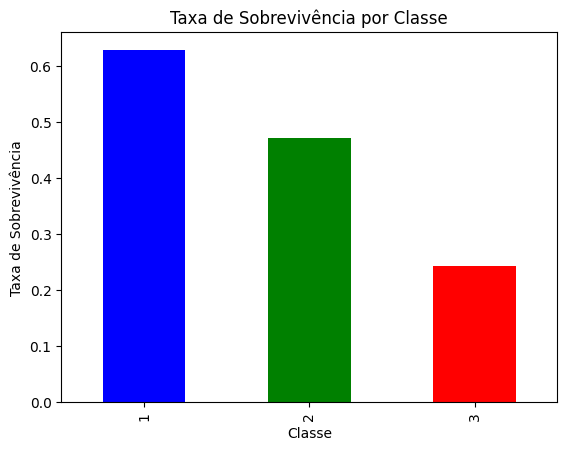

In [ ]:
import matplotlib.pyplot as plt

sobrevivencia_por_classe.plot(kind='bar', color=['blue', 'green', 'red'])
plt.xlabel("Classe")
plt.ylabel("Taxa de Sobrevivência")
plt.title("Taxa de Sobrevivência por Classe")
plt.show()


# 🚻 9. Sobrevivência por Sexo

Analisando qual sexo teve maior taxa de sobrevivência:

In [ ]:
sobrevivencia_por_sexo = df.groupby("Sex")["Survived"].mean()
print(sobrevivencia_por_sexo)


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


- plotagem de gráfico para análise visual:

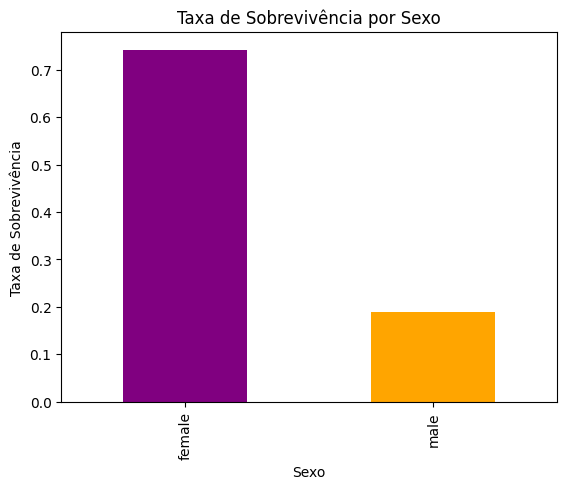

In [ ]:
sobrevivencia_por_sexo.plot(kind='bar', color=['purple', 'orange'])
plt.xlabel("Sexo")
plt.ylabel("Taxa de Sobrevivência")
plt.title("Taxa de Sobrevivência por Sexo")
plt.show()


# 👶🧑 10. Quantidade de Adultos e Crianças

- Uma abordagem comum é considerar crianças aqueles com idade inferior a 18 anos:

In [ ]:
df['Age_Group'] = df['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult')

qtd_criancas = df[df['Age_Group'] == 'Child'].shape[0]
qtd_adultos = df[df['Age_Group'] == 'Adult'].shape[0]

print(f"Quantidade de crianças: {qtd_criancas}")
print(f"Quantidade de adultos: {qtd_adultos}")


Quantidade de crianças: 113
Quantidade de adultos: 778


- Taxa de sobrevivência entre crianças e adultos:

In [ ]:
sobrevivencia_por_idade = df.groupby("Age_Group")["Survived"].mean()
print(sobrevivencia_por_idade)


Age_Group
Adult    0.361183
Child    0.539823
Name: Survived, dtype: float64


# 🧼 11. Tabela Resumo com Insights

- principais insights:

In [ ]:
import pandas as pd

resumo = pd.DataFrame({
    "Métrica": ["Taxa de Sobrevivência Geral", "Taxa de Sobrevivência Homens", "Taxa de Sobrevivência Mulheres",
                "Sobrevivência 1ª Classe", "Sobrevivência 2ª Classe", "Sobrevivência 3ª Classe"],
    "Valor": [df['Survived'].mean(),
              df[df['Sex'] == 'male']['Survived'].mean(),
              df[df['Sex'] == 'female']['Survived'].mean(),
              df[df['Pclass'] == 1]['Survived'].mean(),
              df[df['Pclass'] == 2]['Survived'].mean(),
              df[df['Pclass'] == 3]['Survived'].mean()]
})

# Exibir o dataframe no Jupyter Notebook
from IPython.display import display

display(resumo)


,Métrica,Valor
0,Taxa de Sobrevivência Geral,0.383838
1,Taxa de Sobrevivência Homens,0.188908
2,Taxa de Sobrevivência Mulheres,0.742038
3,Sobrevivência 1ª Classe,0.629630
4,Sobrevivência 2ª Classe,0.472826
5,Sobrevivência 3ª Classe,0.242363


-  Gráfico de Barras - Comparação entre Gênero e Classe

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128697 (\N{MENS SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128698 (\N{WOMENS SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


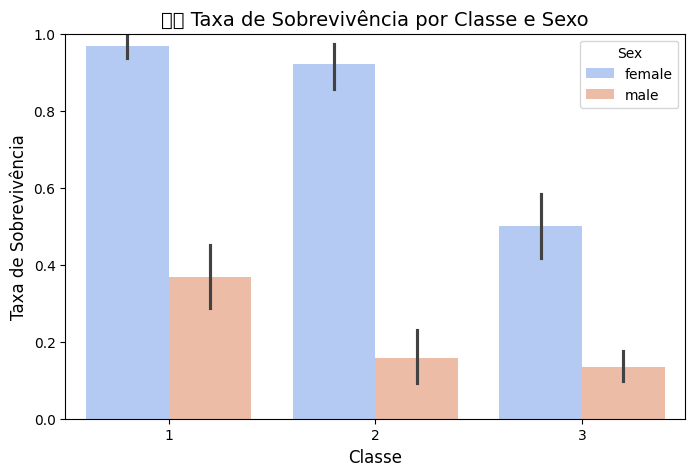

In [ ]:
# Criar gráfico de sobrevivência por classe e sexo
plt.figure(figsize=(8,5))
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df, palette="coolwarm")

plt.xlabel("Classe", fontsize=12)
plt.ylabel("Taxa de Sobrevivência", fontsize=12)
plt.title("🚹🚺 Taxa de Sobrevivência por Classe e Sexo", fontsize=14)
plt.ylim(0, 1)
plt.show()


# 🚢 Desafio 1: Titanic - Resumo das Descobertas

1️⃣ Qual a taxa de sobrevivência geral no navio?

✅ Resposta: 38,38% dos passageiros sobreviveram.


2️⃣ Qual a taxa de sobrevivência por classe (Pclass)?
✅ Resposta:


1ª Classe: 62,96%

2ª Classe: 47,28%

3ª Classe: 24,24%

➡️ Os passageiros da 1ª classe tiveram maior taxa de sobrevivência, enquanto os da 3ª classe foram os mais impactados pelo naufrágio.

3️⃣ Qual o sexo com maior taxa de sobrevivência?

✅ Resposta:

Homens: 18,89%

Mulheres: 74,20%

➡️ As mulheres tiveram uma taxa de sobrevivência quase quatro vezes maior do que os homens, reforçando a política de "mulheres e crianças primeiro".

4️⃣ Baseado nos dados informados, qual a quantidade de adultos e crianças (sobreviventes e não sobreviventes)?


In [ ]:
qtd_criancas = df[df['Age'] < 18].shape[0]
qtd_adultos = df[df['Age'] >= 18].shape[0]
print(f"Quantidade de crianças: {qtd_criancas}")
print(f"Quantidade de adultos: {qtd_adultos}")



Quantidade de crianças: 113
Quantidade de adultos: 601


 - plotagem de heatmap de correlação entre váriaveis para  Insights Extras

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


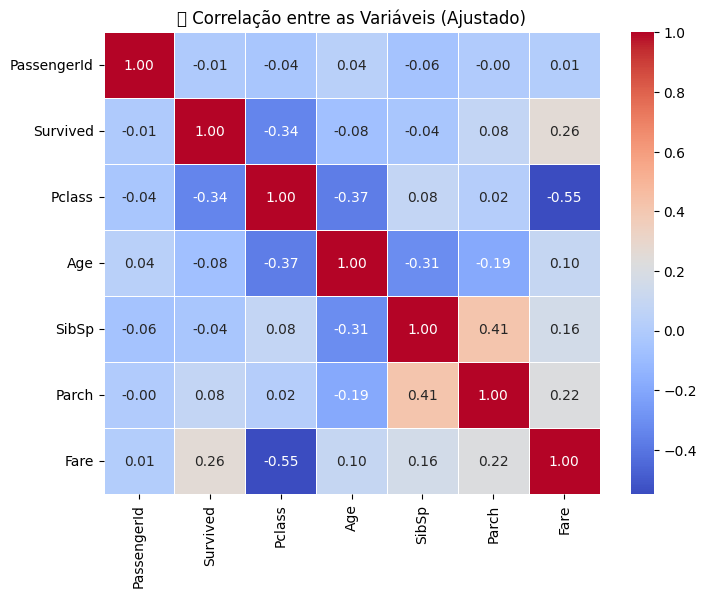

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("📊 Correlação entre as Variáveis (Ajustado)")
plt.show()



**🔍 Principais Observações do Heatmap**

1️⃣ Fare vs. Survived → Correlação = 0.26

- Significado: Passageiros que pagaram tarifas mais altas tinham mais chances de sobreviver.

- Explicação: Isso faz sentido porque as tarifas mais altas estavam associadas à 1ª classe, que teve maior taxa de sobrevivência.

2️⃣ Pclass vs. Survived → Correlação = -0.34

- Significado: Passageiros de c

- Explicação: A correlação negativa indica que quanto maior a classe (1ª), maior a sobrevivência.

3️⃣ Pclass vs. Fare → Correlação = -0.55

- Significado: A classe do passageiro e o preço do bilhete estão fortemente relacionados.

- Explicação: 1ª classe pagava muito mais do que a 3ª classe.

4️⃣ Parch e SibSp vs. Survived → Correlação próxima de 0

- Significado: Ter mais familiares a bordo não teve um impacto muito forte na sobrevivência.

# 📌 Conclusão




✅ Passageiros que pagaram mais caro (1ª classe) tinham mais chances de sobrevivência.

✅ Passageiros da 3ª classe tiveram maior taxa de mortalidade.

✅ O fator mais importante para prever a sobrevivência é a Pclass e o Fare.

Com essa análise, podemos observar  a influência do valor do bilhete na sobrevivência 🚢📊